# 결정트리_기본실습문제 답안

## 1 번 과제

In [1]:
# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

balance = pd.read_csv('balance-scale.csv',header=None)
balance.columns = ['Target', 'L_Weight', 'L_Distance', 'R_Weight', 'R_Distance']
balance

Target  L_Weight  L_Distance  R_Weight  R_Distance
0        B         1           1         1           1
1        R         1           1         1           2
2        R         1           1         1           3
3        R         1           1         1           4
4        R         1           1         1           5
..     ...       ...         ...       ...         ...
620      L         5           5         5           1
621      L         5           5         5           2
622      L         5           5         5           3
623      L         5           5         5           4
624      B         5           5         5           5

[625 rows x 5 columns]

In [3]:
balance_data = balance.iloc[:,1:]   # x data 
balance_label = balance.iloc[:,0]    # y data
balance_data

L_Weight  L_Distance  R_Weight  R_Distance
0           1           1         1           1
1           1           1         1           2
2           1           1         1           3
3           1           1         1           4
4           1           1         1           5
..        ...         ...       ...         ...
620         5           5         5           1
621         5           5         5           2
622         5           5         5           3
623         5           5         5           4
624         5           5         5           5

[625 rows x 4 columns]

In [4]:
# 학습 데이터와 테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(balance_data, balance_label, 
                                                    test_size=0.3, random_state=11)  # random seed 고정, 동일한 데이터 추출
# X_train, X_test, y_train, y_test
# train :436 개(70%) ,test: 188 개(30%)  

In [5]:
# 학습 데이터 세트로 학습(Train) 수행

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)  # seed 고정, 동일한 학습/예측 결과를 출력

# 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [6]:
# 테스트 데이터 세트로 예측(Predict) 수행

pred = dt_clf.predict(X_test)
pred

array(['L', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'L', 'L', 'L',
       'L', 'L', 'L', 'R', 'R', 'R', 'B', 'L', 'L', 'R', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'B', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'B', 'R', 'L', 'B', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'R',
       'L', 'R', 'R', 'R', 'L', 'R', 'R', 'L', 'B', 'R', 'L', 'L', 'L',
       'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'B', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'R',
       'L', 'B', 'R', 'R', 'B', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'B', 'B', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'L',
       'R', 'L', 'B', 'L', 'R', 'B', 'B', 'L', 'L', 'L', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'L', 'L', 'B', 'L',
       'R', 'R', 'R', 'B', 'L', 'R', 'L', 'L', 'L', 'R', 'R', 'L', 'B',
       'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'R

In [7]:
# ** 예측 정확도 평가 **
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

cl_report = classification_report(y_test,pred)
print('리포트:\n',cl_report)

정확도: 0.7819
리포트:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        14
           L       0.88      0.82      0.85        88
           R       0.86      0.87      0.87        86

    accuracy                           0.78       188
   macro avg       0.58      0.56      0.57       188
weighted avg       0.81      0.78      0.79       188



## 2번 과제
### 결정 트리 모델의 시각화(Decision Tree Visualization) : 결정트리 학습 과정을 시각화함

In [8]:
balance = pd.read_csv('balance-scale.csv',header=None)
balance.columns = ['Target', 'L_Weight', 'L_Distance', 'R_Weight', 'R_Distance']
        
balance_data = balance.iloc[:,1:]   # x data 
balance_label = balance.iloc[:,0]    # y data

# 학습 데이터와 테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(balance_data, balance_label, 
                                                    test_size=0.3, random_state=11)  # random seed 고정, 동일한 데이터 추출

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)  # seed 고정, 동일한 학습/예측 결과를 출력
# dt_clf = DecisionTreeClassifier(random_state=11,max_depth =4 )  # 파라메터를 변경하면서 비교해본다


# 학습 수행 
dt_clf.fit(X_train, y_train)

balance_data.columns

Index(['L_Weight', 'L_Distance', 'R_Weight', 'R_Distance'], dtype='object')

In [9]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="balance_tree.dot", class_names=['B','L','R'] , \
feature_names = balance_data.columns, impurity=True, filled=True)

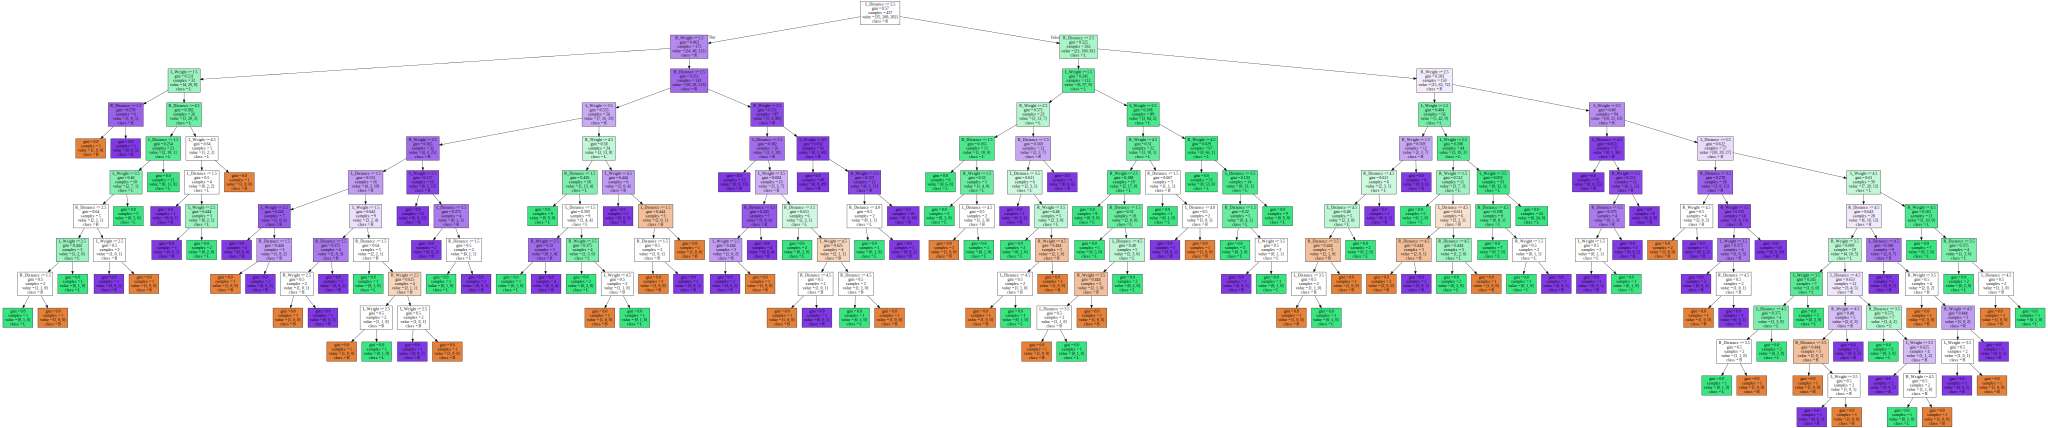

In [10]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
f = open("balance_tree.dot")
dot_graph = f.read()
# print(dot_graph)         
graphviz.Source(dot_graph)

Feature importances:
[0.237 0.235 0.265 0.263]
L_Weight : 0.237
L_Distance : 0.235
R_Weight : 0.265
R_Distance : 0.263


Index(['L_Weight', 'L_Distance', 'R_Weight', 'R_Distance'], dtype='object')

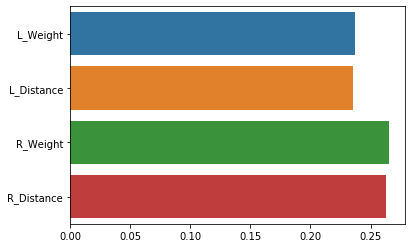

In [14]:
import seaborn as sns
import numpy as np

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(balance_data.columns , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=balance_data.columns) # y축의 문자열이 숫자형이면 오류발생
balance_data.columns

## 3번 과제
### LabelEncoder 사용

In [12]:
# # 레이블 인코딩(Label encoding) 사용시
from sklearn.preprocessing import LabelEncoder

balance = pd.read_csv('balance-scale.csv',header=None)
balance.columns = ['Target', 'L_Weight', 'L_Distance', 'R_Weight', 'R_Distance']


items = balance['Target']
        
encoder = LabelEncoder()
encoder.fit(items)
labels  = encoder.transform(items)
print('encoding 변환 값:',labels) # B:0, L:1,R:2

balance['label'] = labels
balance_data = balance.iloc[:,1:-1]   # x data 
balance_label = balance.iloc[:,-1]    # y data

# 학습 데이터와 테스트 데이터 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(balance_data, balance_label, 
                                                    test_size=0.3, random_state=11)  # random seed 고정, 동일한 데이터 추출

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)  # seed 고정, 동일한 학습/예측 결과를 출력

# 학습 수행 
dt_clf.fit(X_train, y_train)

# 테스트 데이터 세트로 예측(Predict) 수행

pred = dt_clf.predict(X_test)
pred


encoding 변환 값: [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 1 2 2 2 1
 2 2 2 2 1 2 2 2 2 0 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 2 2
 1 0 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 0 2 1 1 2 2 2 1 0 2 2 2 1 2
 2 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1 2 2 2 1 0 2 2 2 1 1 0 2 2 1 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 2 2 1 0 2 2 2 1 2 2 2 2 1
 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 0 2 2 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 2 1 1 0 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2
 1 1 0 2 2 1 1 1 0 2 1 0 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 0 2 1 1 2 2 2 1 0 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 0 2
 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 2 2 1 1 1 1 1 1
 1 1 1 1 1

array([1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2])

In [13]:
# ** 예측 정확도 평가 **
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

cl_report = classification_report(y_test,pred)
print('리포트:\n',cl_report)

정확도: 0.7819
리포트:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.88      0.82      0.85        88
           2       0.86      0.87      0.87        86

    accuracy                           0.78       188
   macro avg       0.58      0.56      0.57       188
weighted avg       0.81      0.78      0.79       188

